As an additional demonstration of the mode-decomposition feature, the reflectance and transmittance of all diffracted orders for any grating with no material absorption and a planewave source incident at any arbitrary angle and wavelength must necessarily sum to unity. Also, the total reflectance and transmittance must be equivalent to values computed using the Poynting flux. This demonstration is somewhat similar to the [single-mode waveguide example](https://nbviewer.jupyter.org/github/NanoComp/meep/blob/master/python/examples/mode-decomposition.ipynb).

The following example is adapted from the previous binary-grating example involving a [normally-incident planewave](https://nbviewer.jupyter.org/github/NanoComp/meep/blob/master/python/examples/binary_grating.ipynb). 

The total reflectance, transmittance, and their sum are plotted at the end of the simulation.

Results are computed for a single wavelength of 0.5 μm. The pulsed planewave is incident at an angle of 10.7°. Its spatial profile is defined using the source amplitude function `pw_amp`. This [anonymous function](https://en.wikipedia.org/wiki/Anonymous_function) takes two arguments, the wavevector and a point in space (both `mp.Vector3`s), and returns a function of one argument which defines the planewave amplitude at that point. A narrow bandwidth pulse is used in order to mitigate the intrinsic discretization effects of the [Yee grid](../Yee_Lattice.md) for oblique planewaves. Also, the `stop_when_fields_decayed` termination criteria is replaced with `until_after_sources`. As a general rule of thumb, the more oblique the planewave source, the longer the run time required to ensure accurate results. There is an additional line monitor between the source and the grating for computing the reflectance. The angle of each reflected/transmitted mode, which can be positive or negative, is computed using its dominant planewave vector. Since the oblique source breaks the symmetry in the $y$ direction, each diffracted order must be computed separately. In total, there are 59 reflected and 39 transmitted orders.

As usual, we'll begin by loading our required modules:

In [41]:
import meep as mp
import math
import cmath
import numpy as np
from matplotlib import pyplot as plt

In [42]:
resolution = 50        # pixels/μm

dpml = 1.0             # PML thickness
dsub = 3.0             # substrate thickness
dpad = 3.0             # length of padding between grating and PML
gp = 10.0              # grating period
gh = 0.5               # grating height
gdc = 0.5              # grating duty cycle

sx = dpml+dsub+gh+dpad+dpml
sy = gp

cell_size = mp.Vector3(sx,sy,0)
pml_layers = [mp.PML(thickness=dpml,direction=mp.X)] 

We can now define the oblique source we'll use to excite the grating structure.

In [43]:
ng = 1.5
glass = mp.Medium(index=ng)

wvl = 0.5              # center wavelength
fcen = 1/wvl           # center frequency
df = 0.05*fcen         # frequency width

# rotation angle of incident planewave; counter clockwise (CCW) about Z axis, 0 degrees along +X axis
theta_in = math.radians(10)

# k (in source medium) with correct length (plane of incidence: XY)
k = mp.Vector3(fcen*ng).rotate(mp.Vector3(z=1), theta_in)

symmetries = []
eig_parity = mp.ODD_Z
if theta_in == 0:
  k = mp.Vector3(0,0,0)
  symmetries = [mp.Mirror(mp.Y)]
  eig_parity += mp.EVEN_Y

def pw_amp(k,x0):
  def _pw_amp(x):
    return cmath.exp(1j*2*math.pi*k.dot(x+x0))
  return _pw_amp

src_pt = mp.Vector3(-0.5*sx+dpml+0.3*dsub,0,0)
sources = [mp.Source(mp.GaussianSource(fcen,fwidth=df),
                     component=mp.Ez,
                     center=src_pt,
                     size=mp.Vector3(0,sy,0),
                     amp_func=pw_amp(k,src_pt))]

We'll now initialize our simulation object. Since our first run is a normalization run, we'll set the entire domain to be the same material (glass in this case).

In [44]:
sim = mp.Simulation(resolution=resolution,
                    cell_size=cell_size,
                    boundary_layers=pml_layers,
                    k_point=k,
                    default_material=glass,
                    sources=sources,
                    symmetries=symmetries)

refl_pt = mp.Vector3(-0.5*sx+dpml+0.5*dsub,0,0)
refl_flux = sim.add_flux(fcen, 0, 1, mp.FluxRegion(center=refl_pt, size=mp.Vector3(0,sy,0)))

Since everything looks as expected, we can now run our normalization simulation. We'll record the flux data for future use.

-----------
Initializing structure...
time for choose_chunkdivision = 7.08103e-05 s
Working in 2D dimensions.
Computational cell is 8.5 x 10 x 0 with resolution 50
time for set_epsilon = 0.187525 s
-----------
Meep: using complex fields.


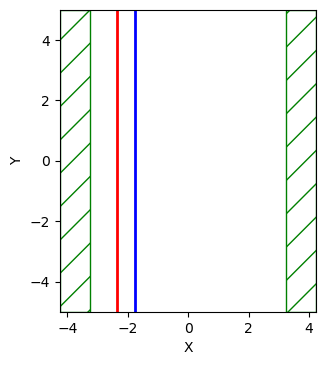

In [45]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(dpi=100)
sim.plot2D()
plt.show()

In [46]:
sim.run(until_after_sources=100)

input_flux = mp.get_fluxes(refl_flux)
input_flux_data = sim.get_flux_data(refl_flux)

Meep progress: 14.58/200.0 = 7.3% done in 4.0s, 50.9s to go
on time step 1458 (time=14.58), 0.0027443 s/step
Meep progress: 26.11/200.0 = 13.1% done in 8.0s, 53.3s to go
on time step 2611 (time=26.11), 0.00347178 s/step
Meep progress: 41.410000000000004/200.0 = 20.7% done in 12.0s, 46.0s to go
on time step 4142 (time=41.42), 0.00261394 s/step
Meep progress: 58.33/200.0 = 29.2% done in 16.0s, 38.9s to go
on time step 5834 (time=58.34), 0.00236505 s/step
Meep progress: 76.77/200.0 = 38.4% done in 20.0s, 32.1s to go
on time step 7679 (time=76.79), 0.00216834 s/step
Meep progress: 95.89/200.0 = 47.9% done in 24.0s, 26.1s to go
on time step 9591 (time=95.91), 0.00209245 s/step
Meep progress: 114.92/200.0 = 57.5% done in 28.0s, 20.7s to go
on time step 11494 (time=114.94), 0.00210198 s/step
Meep progress: 134.07/200.0 = 67.0% done in 32.0s, 15.7s to go
on time step 13409 (time=134.09), 0.00208889 s/step
Meep progress: 152.57/200.0 = 76.3% done in 36.0s, 11.2s to go
on time step 15258 (time=1

We'll now reset our simulation domain using the `reset_meep` command and generate the periodic grating structure.

In [60]:
sim.reset_meep()

geometry = [mp.Block(material=glass, size=mp.Vector3(dpml,0.9*sy,mp.inf), center=mp.Vector3(0,0,0))]

sim = mp.Simulation(resolution=resolution,
                    cell_size=cell_size,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    k_point=k,
                    sources=sources,
                    symmetries=symmetries)

refl_flux = sim.add_flux(fcen, 0, 1, mp.FluxRegion(center=refl_pt, size=mp.Vector3(0,sy,0)))
sim.load_minus_flux_data(refl_flux,input_flux_data)

tran_pt = mp.Vector3(0.5*sx-dpml-0.5*dpad,0,0)
tran_flux = sim.add_flux(fcen, 0, 1, mp.FluxRegion(center=tran_pt, size=mp.Vector3(0,sy,0)))

-----------
Initializing structure...
time for choose_chunkdivision = 7.89165e-05 s
Working in 2D dimensions.
Computational cell is 8.5 x 10 x 0 with resolution 50
     block, center = (0,0,0)
          size (1,9,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.25,2.25,2.25)
time for set_epsilon = 0.210801 s
-----------
Meep: using complex fields.


Finally, we'll simulate the actual grating structure.

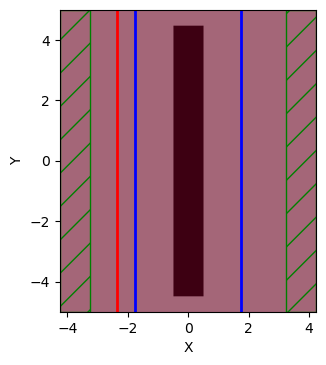

In [61]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(dpi=100)
sim.plot2D(fields=mp.Ez)
plt.show()

Meep progress: 17.93/200.2 = 9.0% done in 4.0s, 40.7s to go
on time step 1793 (time=17.93), 0.00223189 s/step
Meep progress: 34.410000000000004/200.2 = 17.2% done in 8.0s, 38.6s to go
on time step 3441 (time=34.41), 0.00242775 s/step
Meep progress: 54.300000000000004/200.2 = 27.1% done in 12.0s, 32.3s to go
on time step 5430 (time=54.3), 0.00201173 s/step
Meep progress: 74.01/200.2 = 37.0% done in 16.0s, 27.3s to go
on time step 7401 (time=74.01), 0.00203075 s/step
Meep progress: 93.9/200.2 = 46.9% done in 20.0s, 22.7s to go
on time step 9390 (time=93.9), 0.00201188 s/step
Meep progress: 113.84/200.2 = 56.9% done in 24.0s, 18.2s to go
on time step 11384 (time=113.84), 0.00200688 s/step
Meep progress: 130.84/200.2 = 65.4% done in 28.0s, 14.9s to go
on time step 13084 (time=130.84), 0.00235302 s/step
Meep progress: 149.18/200.2 = 74.5% done in 32.0s, 10.9s to go
on time step 14918 (time=149.18), 0.00218222 s/step
Meep progress: 166.68/200.2 = 83.3% done in 36.0s, 7.2s to go
on time step 

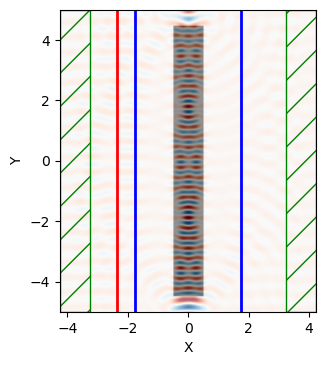

In [62]:
sim.run(until=200.2)
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(dpi=100)
sim.plot2D(fields=mp.Ez)
plt.show()

In [63]:
sim.reset_meep()
f = plt.figure(dpi=100)
Animate = mp.Animate2D(sim, fields=mp.Ez, f=f, realtime=False, normalize=True)
plt.close()
sim.run(mp.at_every(0.5,Animate),until=100)
plt.close()
filename = "oblique.mp4"
Animate.to_mp4(10,filename)
from IPython.display import Video
Video(filename)

-----------
Initializing structure...
time for choose_chunkdivision = 7.10487e-05 s
Working in 2D dimensions.
Computational cell is 8.5 x 10 x 0 with resolution 50
     block, center = (0,0,0)
          size (1,9,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.25,2.25,2.25)
time for set_epsilon = 0.205619 s
-----------
Meep: using complex fields.
Meep progress: 12.71/100.0 = 12.7% done in 4.0s, 27.5s to go
on time step 1271 (time=12.71), 0.00314759 s/step
Meep progress: 31.11/100.0 = 31.1% done in 8.0s, 17.7s to go
on time step 3111 (time=31.11), 0.00217408 s/step
Meep progress: 49.46/100.0 = 49.5% done in 12.0s, 12.3s to go
on time step 4946 (time=49.46), 0.00218056 s/step
Meep progress: 67.89/100.0 = 67.9% done in 16.0s, 7.6s to go
on time step 6789 (time=67.89), 0.00217105 s/step
Meep progress: 85.94/100.0 = 85.9% done in 20.0s, 3.3s to go
on time step 8594 (time=85.94), 0.00221635 s/step
Normalizing field data...
run 1 finished at